# Model Development

A model can be thought of as a mathematical equation used to predict a value (dependent variable) given one or more other values (independent variables/features). A model helps us understand the exact relationship between different features and how these features are used to predict the result. 

In this notebook, we develop several models that will predict the price of the car using the variables/features. In data analytics, we often use model development to help us predict future observations from the data we have. 

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('usedCarsDataClean.csv')
df.shape

(201, 30)

In [3]:
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,diesel,gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,-0.438315,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,8.703704,13495.0,11.190476,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,-0.438315,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,8.703704,16500.0,11.190476,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,-0.243544,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,9.038462,16500.0,12.368421,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.194690,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,7.833333,13950.0,9.791667,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.194690,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,10.681818,17450.0,13.055556,Low,0,1,1,0


## 1. Linear Regression and Multiple Linear Regression

Simple linear regression refers to one independent variable to make a prediction, while multiple linear regression refers to multiple independent variables to make a prediction. Note that the dependent variable being a linear function of independent variables is an assumption which has to be tested. There is a priori no reason why the dependence should be linear. It is just the simplest model to get started with modelling.

**Simple Linear Regression (SLR):** 

Simple Linear Regression is a method to help us understand the relationship between two variables, the predictor (independent) variable X and the target (dependent) variable Y (which we want to predict).

The result of linear regression is a linear function, that predicts the dependent variable as a function of the independent variable:

                       Yhat = a + bX              a,b are intercept and slope of the regression line
                       
When we fit or train the model, we come up with the values of parameters a and b.                     

Lets do simple linear regression with one variable, to see how could highway-mpg help us predict car price: 

In [4]:
df['highway-mpg'] = 235/df['highway-L/100km']
X = df[['highway-mpg']]                        # predictor variable
Y = df['price']                                # target variable

In [5]:
lm_simple = LinearRegression()  # first we create the linear regression object
lm_simple.fit(X,Y)              # fit the linear model to obtain the model parameters a,b

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
print(lm_simple.intercept_, lm_simple.coef_)          # intercept and slope

38423.305858157386 [-821.73337832]


Thus, we estimated a linear model: **price = 38423.3 - 821.73*highway_mpg**. We can output a prediction

In [7]:
Yhat = lm_simple.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

**Multiple Linear Regression (MLR):**

If we want to use more than one feature in our model to predict car price, we can use Multiple Linear Regression. It is very similar to Simple Linear Regression, except that this method is used to explain the relationship between one dependent (target) variable and two or more independent (predicator) variables. Most of the real world regression models use multiple predicators. 

The equation for Multiple Linear Regression (with 4 independent variables) is given by :

\begin{equation*}
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
\end{equation*}

a is intercept, b's are coefficients of predictor variables X's.

Let's develop a multiple linear regression model using horse-power, curb-weight, engine-size and highway-mpg (as we know from our exploratory data analysis that these features are good predictor of car price) :

In [8]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]     # select the predictor variables
lm_multi = LinearRegression()
lm_multi.fit(Z, df['price'])                # fit the linear model to obtain intercept and coefficients
print(lm_multi.intercept_, lm_multi.coef_)  # intercept and coefficients b1, b2, b3, b4

-15806.624626329183 [53.49574423  4.70770099 81.53026382 36.05748882]


Thus we estimated a linear model: **price = -15806.6 + 53.5*horsepower + 4.7*curb-weight + 81.5*engine-size + 36.1*highway-mpg**

## 2. Model Evaluation using Visualization

Now that we've developed some models, how do we evaluate our models and how do we choose the best one? One way to do this is by using visualization.

### A. Regression Plot

When it comes to simple linear regression, an excellent way to visualise the fit of our model is by using **regression plots**. This plot will show a combination of a scattered data points (a **scatterplot**), as well as the fitted **linear regression** line going through the data.

Let's visualize highway-mpg as potential predictor variable of price:

(0, 48297.112985276435)

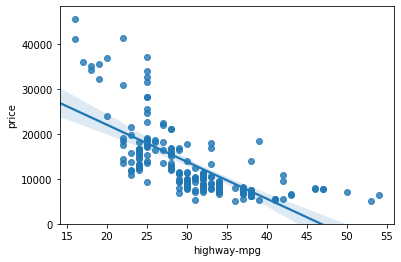

In [9]:
plt.figure(figsize = (6,4))
sns.regplot(x = "highway-mpg", y = "price", data = df)
plt.ylim(0,)

We can see from this plot that price is negatively correlated to highway-mpg. An important thing to notice in a regression plot is how scattered the data points are around the regression line. This gives a good indication of the variance of the data, and whether a linear model would be the best fit or not. If the data is too far off from the line, this linear model might not be the best model for this data. Let's compare this plot to the regression plot of "peak-rpm".

(0, 47436.148325769056)

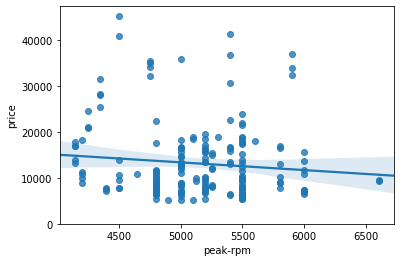

In [10]:
plt.figure(figsize = (6,4))
sns.regplot(x = "peak-rpm", y = "price", data = df)
plt.ylim(0,)

Comparing the regression plot of "peak-rpm" and "highway-mpg", we see that the points for "highway-mpg" are much closer to the generated line and on the average decreases. The points for "peak-rpm" have more spread around the predicted line, and it is much harder to determine if the points are decreasing or increasing as the "peak-rpm" increases.

In [11]:
df[['highway-mpg', 'peak-rpm', 'price']].corr()

,highway-mpg,peak-rpm,price
highway-mpg,1.000000,-0.058598,-0.704692
peak-rpm,-0.058598,1.000000,-0.101616
price,-0.704692,-0.101616,1.000000


We can observe that highway-mpg has moderately strong correlation with price, while peak-rpm has weak correlation.

### B. Residual Plot

A good way to visualize the variance of the data is to use a residual plot.

**Residual:** The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance of the data point from the fitted regression line.

**Residual plot:** A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.

**To observe:** If the points in a residual plot are randomly spread (evenly spread with approx. zero mean) out around the x-axis, then a linear model is appropriate for the data. Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.

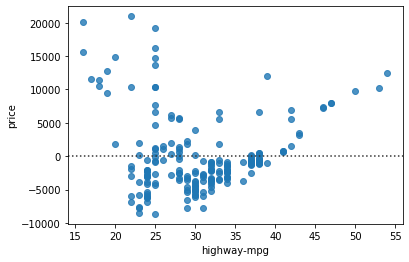

In [12]:
plt.figure(figsize = (6,4))
sns.residplot(df['highway-mpg'], df['price'])

We see that the residuals are not randomly spread around the x-axis, which leads us to believe that maybe a non-linear model could be more appropriate.

### C. Multiple Linear Regression

We can not visualize a model for Multiple Linear Regression using regression or residual plot. In this case, one way to look at the fit of the model is by looking at the **distribution plot**: We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

Let's compare the distribution plot of the Multiple Linear Regression we did above:

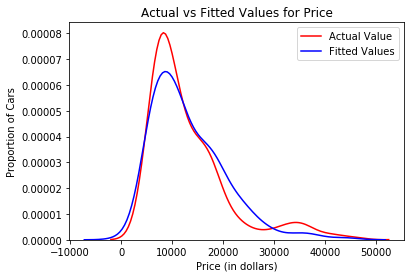

In [13]:
Yhat = lm_multi.predict(Z)      # prediction using the fitted linear function

plt.figure(figsize = (6,4))
ax1 = sns.distplot(df['price'], hist = False, color = "r", label = "Actual Value")
sns.distplot(Yhat, hist = False, color = "b", label = "Fitted Values" , ax = ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

We see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement.

## 3. Polynomial Regression and Pipelines

What do we do when a linear model is not the best fit for our data ? We can look at another type of regression model called polynomial regression. In polynomial regression, we transform our data into a polynomial, and then use linear regression to fit the parameters.

Polynomial regression is a special case of the general linear regression model. This regression is useful for describing curvilinear relationship. Curvilinear relationship means the target variable is higher-order (quadratic, cubic...) non-linear function of the predictor variables.

There are different orders of polynomial regression:

**Quadratic**: $ Yhat = a + b_1 X +b_2 X^2 $

**Cubic**: $ Yhat = a + b_1 X +b_2 X^2 +b_3 X^3 $

**Higher order**: $ Yhat = a + b_1 X^2 +b_2 X^2 +b_3 X^3 ....$

The degree of the regression model (order of the polynomial employed) makes a big difference and can result in a better fit if we pick the right degree of polynomial. We saw earlier that a linear model did not provide the best fit while using highway-mpg as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.

First, lets define a function which we use to plot the data:

In [14]:
def PlotPoly(model, independent_variable, dependent_variable, Name):
    
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.figure(figsize = (6,4))
    plt.plot(independent_variable, dependent_variable, '.' , x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

Now, let's fit the polynomial using the function **polyfit** : 

In [15]:
x = df['highway-mpg']
y = df['price']

f = np.polyfit(x, y, 3)     # Here we use a polynomial of the 3rd order (cubic) 
p = np.poly1d(f)            # we use the function poly1d to display the polynomial function
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


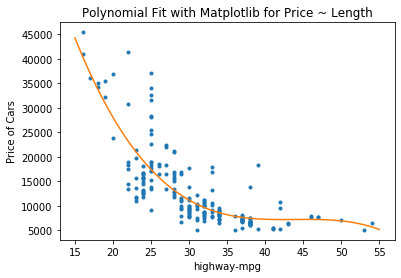

In [16]:
PlotPoly(p, x, y, 'highway-mpg')

We see that this polynomial model performs better than the linear model.

### Multidimensional polynomial linear regression

The analytical expression for Multivariate Polynomial function gets complicated. For example, the expression for a second-order (degree=2) polynomial with two variables is given by:
\begin{equation*}
Yhat = a + b_1 X_1 +b_2 X_2 +b_3 X_1 X_2+b_4 X_1^2+b_5 X_2^2
\end{equation*}


Numpy's polyfit function can not perform this type of regression. We use the preprocessing library in scikit-learn to create a polynomial feature object, then we transform the features (our original features) into polynomial features using fit_transform method.

In [17]:
pr = PolynomialFeatures(degree = 2)
Z_pr = pr.fit_transform(Z)
print(Z.shape)               # the original data is of 201 samples and 4 features
print(Z_pr.shape)            # after the transformation, there 201 samples and 15 features

(201, 4)
(201, 15)


### Pipeline

We can simplify our code by using a pipeline library. There are many steps involved while getting to prediction, such as normalization, polynomial transform, linear regression. We simplify the process using a pipeline. Pipeline sequentially performs a series of tranformations, the last step carries out prediction.

We create a pipeline, by creating a list of tuples. The first element in the tuple is the model/estimator, and the second element is the corresponding constructor.

In [18]:
Input = [('scale', StandardScaler()),
         ('polynomial', PolynomialFeatures(include_bias = False)),
         ('model', LinearRegression())]

In this list, StandardScaler() is for normalization, PolynomialFeatures() for creating the new polynomial features of our original features and LinearRegression() for model fitting. We input the list as an argument to the pipeline constructor

In [19]:
pipe = Pipeline(Input)   # we now have a pipeline object, pipe
pipe.fit(Z, y)           # normalize the data, perform a transform and fit the model simultaneously

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

Similarly, we can normalize the data, perform a transform and produce a prediction simultaneously

In [20]:
ypipe = pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

## 4. Measures for In-Sample Evaluation

When evaluating our models, in addition to visualise the results, we also want a quantitative measure to determine how accurate the model is. Two very important measures that are often used in Statistics to determine the accuracy of a model are:
 - **Mean Squared Error (MSE)**: The Mean Squared Error measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ).
 - **R-squared (Coefficient of determination )**: R-squared, is a measure to indicate how close the data is to the fitted regression line. The value of R-squared is the proportion of the variance in the dependent variable that is predictable from the independent variable(s).

 \begin{equation*}
R^2 = 1 - \frac{SS_{res}}{SS_{tot}}
\end{equation*}

\begin{equation*}
\text{Residual sum of squares}: SS_{res} = \sum_i (y_i-\hat{y}_i)^2
\end{equation*}

\begin{equation*}
\text{Total sum of squares}: SS_{tot} = \sum_i (y_i-\bar{y})^2
\end{equation*}
 
\begin{equation*}
\bar{y}:\text{ mean of actual values}, y_i\\
\text{Note that total sum of squares is proportional to the variance of the data}
\end{equation*}

We can think of it like comparing our regression model to a simple model, i.e mean of the data points. We expect our model (regression model) to perform much better than just the mean (simple model). 

When our regression model is a good fit of the data, SS_res will be small, while SS_tot will be relatively large. Lets visualize this with a simple example: Suppose our data points are scattered around a line of slope 45 degrees. A good regression fit will gives us a line of slope 45 degrees. The simple model (mean of the data points) is a horizontal line. We can see that SS_res will be small and SS_tot will be relatively large. In this case, we obtain R-squared close to 1 showing the regression line is a good fit.

The maximum value of R-squared is 1 for the best fit. When our regression model is not a good fit, R will be significantly less than 1, and can be arbitrarily negative.

### A. Simple Linear Regression

Let's calculate R-squared first

In [21]:
lm_simple.score(X, Y)   # calculates R^2 of the highway-mpg fit (simple linear regression example)

0.49659118843391736

We can say that ~ 49.659% of the variation of the price is explained by this simple linear model fit.

Now, let's calculate the mean squared error (MSE). First, we predict the output i.e., "yhat" using the predict method, where X is the input variable. And then we compare the predicted results with the actual results

In [22]:
Yhat = lm_simple.predict(X)
mean_squared_error(df['price'], Yhat)

31635042.9446399

### B. Multiple Linear Regression

In [23]:
lm_multi.score(Z, df['price'])  # calculates R^2 for the multiple linear regression above

0.8093562806577457

We can say that ~ 80.896 % of the variation of price is explained by this multiple linear regression fit.

In [24]:
Yhat_multi = lm_multi.predict(Z)                    # predict the output
mean_squared_error(df['price'], Yhat_multi)         # calculate the MSE

11980366.87072649

### C. Polynomial Fit

In [25]:
r_squared = r2_score(y, p(x))       # applying r2_score function to get R^2
r_squared       # p is obtained above in cubic fitting of highway-mpg vs price (polynomial fit)

0.6741946663906516

We can say that ~ 67.419 % of the variation of price is explained by this polynomial fit.

In [26]:
mean_squared_error(df['price'], p(x))               # calculating the MSE

20474146.42636123

## 5. Decision Making: Determining a good model fit

How do we determine a good model fit?
 - **R-squared value**: When comparing models, the model with the higher R-squared value is a better fit for the data.
 - **MSE**: When comparing models, the model with the smallest MSE value is a better fit for the data.

#### Let's take a look at the values for the different models we get.
 - Simple Linear Regression (Using Highway-mpg as a Predictor Variable of Price) : R-squared: 0.497, MSE: 3.16 x10^7
 - Multiple Linear Regression (Horsepower, Curb-weight, Engine-size, and Highway-mpg) : R-squared: 0.809, MSE: 1.2 x10^7
 - Polynomial Fit (Highway-mpg as a Predictor Variable of Price) : R-squared: 0.674, MSE: 2.05 x 10^7

### Simple Linear Regression model (SLR) vs Multiple Linear Regression model (MLR)

Usually, the more variables we have, the better the model is at making predictions, but this is not always true. Sometimes we may not have enough data, we may run into numerical problems, or many of the variables may not be useful and or even act as noise. As a result, one should always check the MSE and R^2. 
 
The MSE of SLR (3.16x10^7) is much larger than that of MLR(1.2 x10^7), and the R-squared for the SLR (0.497) is very small compared to the R-squared for the MLR (0.809). Thus, we conclude that, in this case, MLR seems like the better model fit compared to SLR.

### Simple Linear Model (SLR) vs Polynomial Fit

We can see that the Polynomial Fit brought down the MSE, and also brought up the R-squared quite a bit. Thus, we can conclude that this is a better fit model than the simple linear regression for predicting Price with Highway-mpg as a predictor variable.

### Multiple Linear Regression (MLR) vs Polynomial Fit

The MSE for the MLR is smaller than the MSE for the Polynomial Fit, and the R-squared for the MLR is also much larger than for the Polynomial Fit.

Comparing these three models, we conclude that **the MLR model is the best model** to be able to predict price from our dataset. This result makes sense, since we have 27 variables in total, and we know that more than one of those variables are potential predictors of the final car price. 